<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Lab: Analyzing a real world data-set with SQL and Python</font></h1>

# Introduction

This notebook shows how to store a dataset into a database using and analyze data using SQL and Python. In this lab you will:
1. Understand a dataset of selected socioeconomic indicators in Chicago
1. Learn how to store data in an Db2 database on IBM Cloud instance
1. Solve example problems to practice your SQL skills 

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database
Let us first load the SQL extension and establish a connection with the database

In [1]:
# %load_ext sql

In [2]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
# %sql ibm_db_sa://

### Store the dataset in a Table
##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
chicago_socioeconomic_data = pd.read_csv('Census_Data.csv')
#%sql PERSIST chicago_socioeconomic_data

In [4]:
chicago_socioeconomic_data

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PERCAPITAINCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


##### You can verify that the table creation was successful by making a basic query like:

In [5]:
chicago_socioeconomic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PERCAPITAINCOME                               78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [6]:
# %sql SELECT * FROM chicago_socioeconomic_data limit 5;

## Problems

### Problem 1

##### How many rows are in the dataset?

In [7]:
chicago_socioeconomic_data.shape

(78, 9)

Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78

-->

### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?

In [8]:
chicago_socioeconomic_data[chicago_socioeconomic_data["HARDSHIP_INDEX"] > 50.0].count()

COMMUNITY_AREA_NUMBER                           38
COMMUNITY_AREA_NAME                             38
PERCENT OF HOUSING CROWDED                      38
PERCENT HOUSEHOLDS BELOW POVERTY                38
PERCENT AGED 16+ UNEMPLOYED                     38
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    38
PERCENT AGED UNDER 18 OR OVER 64                38
PERCAPITAINCOME                                 38
HARDSHIP_INDEX                                  38
dtype: int64

Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;
Correct answer: 38
-->


### Problem 3

##### What is the maximum value of hardship index in this dataset?

In [9]:
chicago_socioeconomic_data["HARDSHIP_INDEX"].max()

98.0

Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
-->


### Problem 4

##### Which community area which has the highest hardship index?


In [10]:
chicago_socioeconomic_data[chicago_socioeconomic_data["HARDSHIP_INDEX"] == 98.0]

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PERCAPITAINCOME,HARDSHIP_INDEX
53,54.0,Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0


Double-click __here__ for the solution.

<!-- Hint:

## We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

## or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

## or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

Correct answer: 'Riverdale'
-->

### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [11]:
chicago_socioeconomic_data[chicago_socioeconomic_data['PERCAPITAINCOME'] > 60000]

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PERCAPITAINCOME,HARDSHIP_INDEX
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
31,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
-->


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

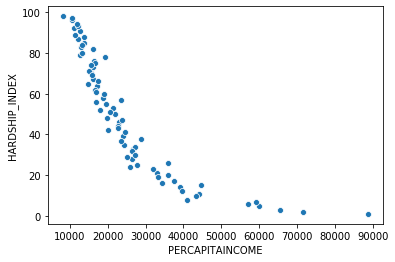

In [12]:
sns.scatterplot(x='PERCAPITAINCOME', y='HARDSHIP_INDEX',data=chicago_socioeconomic_data);

In [13]:
chicago_socioeconomic_data.corr()

,COMMUNITY_AREA_NUMBER,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PERCAPITAINCOME,HARDSHIP_INDEX
COMMUNITY_AREA_NUMBER,1.000000,0.002316,0.147414,0.376196,0.175969,0.428011,-0.398344,0.314853
PERCENT OF HOUSING CROWDED,0.002316,1.000000,0.319403,0.165299,0.875959,0.224692,-0.541730,0.649574
PERCENT HOUSEHOLDS BELOW POVERTY,0.147414,0.319403,1.000000,0.800084,0.424294,0.435894,-0.567025,0.803267
PERCENT AGED 16+ UNEMPLOYED,0.376196,0.165299,0.800084,1.000000,0.355518,0.676532,-0.656619,0.792294
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,0.175969,0.875959,0.424294,0.355518,1.000000,0.408878,-0.709770,0.802538
PERCENT AGED UNDER 18 OR OVER 64,0.428011,0.224692,0.435894,0.676532,0.408878,1.000000,-0.754844,0.690844
PERCAPITAINCOME,-0.398344,-0.541730,-0.567025,-0.656619,-0.709770,-0.754844,1.000000,-0.849167
HARDSHIP_INDEX,0.314853,0.649574,0.803267,0.792294,0.802538,0.690844,-0.849167,1.000000


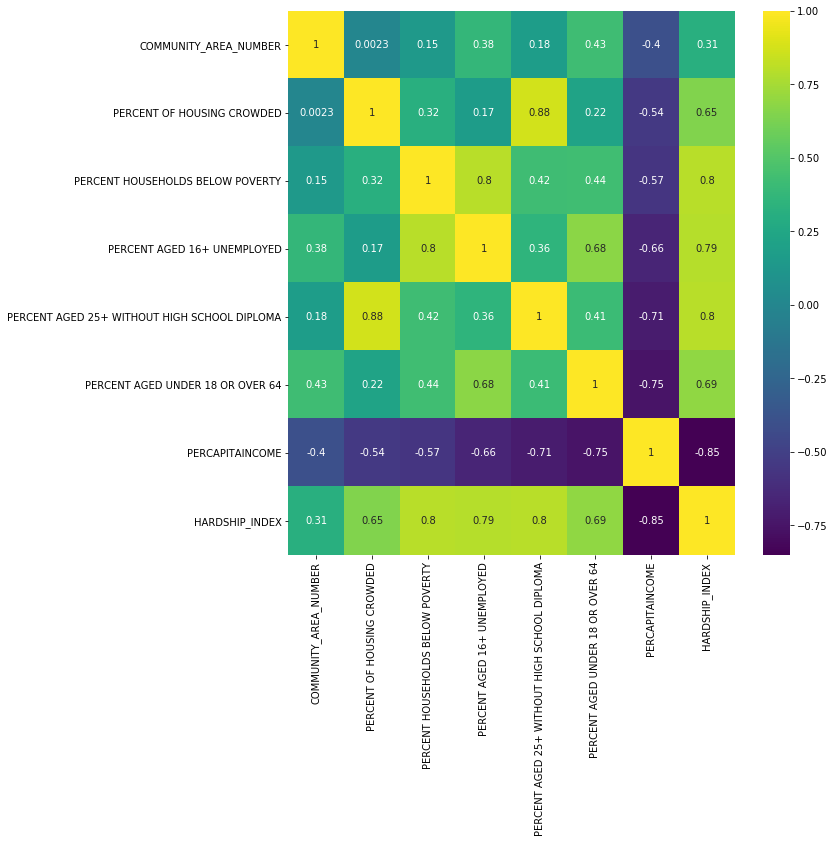

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=chicago_socioeconomic_data.corr(), annot=True, cmap='viridis')
plt.show()

Double-click __here__ for the solution.

<!-- Hint:
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
-->


### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!

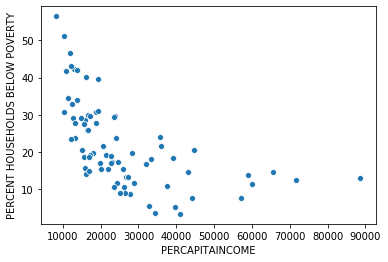

In [15]:
sns.scatterplot(x='PERCAPITAINCOME', y='PERCENT HOUSEHOLDS BELOW POVERTY',data=chicago_socioeconomic_data);

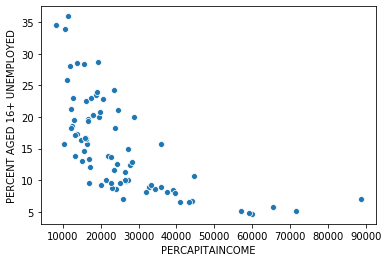

In [16]:
sns.scatterplot(x='PERCAPITAINCOME', y='PERCENT AGED 16+ UNEMPLOYED',data=chicago_socioeconomic_data);

## Summary

##### In this lab you learned how to store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries. You also visualized a portion of the data in the database to see what story it tells.

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).
